In [ ]:
import zipfile

# specify the path to the zip file in your Google Drive
zip_path = '/content/drive/MyDrive/AnaData_val.zip'

# specify the path to the folder where you want to unzip the dataset
extract_path = '/content/dataset/'

# extract the contents of the zip file to the extract_path folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

In [ ]:

# DATA SOURCE -----------------------------------------

batch_size = 25

train_data_dir = r'/content/dataset/dataset/training_set'
validation_data_dir = r'/content/dataset/dataset/validation_test'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.1
)

validation_datagen = ImageDataGenerator(
        rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(250, 250),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(250, 250),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

valid_dataset = keras.preprocessing.image_dataset_from_directory(
    directory= r'/content/dataset/dataset/validation_test',
    image_size=(250,250),
    batch_size=batch_size,
    label_mode='categorical'
)


Found 8000 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.
Found 2002 files belonging to 2 classes.


In [ ]:

model.to_json() 

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 150, 150, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 150, 150, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2]

In [ ]:
#IA GOOGLE

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

model_transfer = VGG16(weights='imagenet', include_top=True)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

model_transfer = VGG16(weights='imagenet', include_top=True)
base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(250, 250, 3),
    include_top=False)

base_model.trainable = False

inputs = keras.Input(shape=(250, 250, 3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)

x = keras.layers.Dense(256, activation='relu')(x)
outputs = keras.layers.Dense(2, activation='softmax')(x)

model_transfer = keras.Model(inputs, outputs)

In [ ]:

model_transfer.compile(loss=tf.keras.losses.categorical_crossentropy,
                      optimizer=tf.keras.optimizers.Adam(1e-3),
                      metrics=['accuracy'])

epochs = 5

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

h = model_transfer.fit(
        train_generator,
        epochs=epochs, 
        validation_data=validation_generator,
        callbacks = [es]
)

Epoch 1/5
320/320 [==============================] - 155s 481ms/step - loss: 0.2141 - accuracy: 0.9109 - val_loss: 0.1573 - val_accuracy: 0.9456
Epoch 2/5
320/320 [==============================] - 153s 479ms/step - loss: 0.1930 - accuracy: 0.9193 - val_loss: 0.1979 - val_accuracy: 0.9161
Epoch 3/5
320/320 [==============================] - 153s 479ms/step - loss: 0.1860 - accuracy: 0.9210 - val_loss: 0.1431 - val_accuracy: 0.9426
Epoch 4/5
320/320 [==============================] - 145s 452ms/step - loss: 0.1793 - accuracy: 0.9262 - val_loss: 0.1531 - val_accuracy: 0.9361
Epoch 5/5
320/320 [==============================] - 146s 455ms/step - loss: 0.1691 - accuracy: 0.9284 - val_loss: 0.1332 - val_accuracy: 0.9441


In [ ]:
img = keras.preprocessing.image.load_img(
    r'/content/dataset/dataset/test_set/dogs/dog.4006.jpg', target_size=(150,150)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model_transfer.predict(img_array)
predictions_transfer = model_transfer.predict(img_array)

print(train_generator.class_indices)
print(np.argmax(predictions[0]))
print(np.argmax(predictions_transfer[0]))
class_names = list(train_generator.class_indices.keys())
print()

if(np.argmax(predictions_transfer[0]) == 0):
        print("I see a picture of " + class_names[0])
else:
        print("I see a picture of " + class_names[1])

FileNotFoundError: ignored

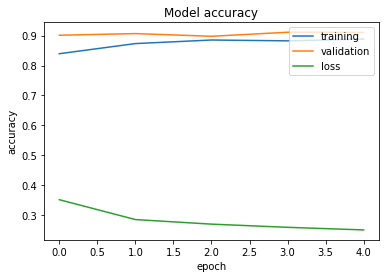

In [ ]:
# EVALUATION ------------------------------------------

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

El generador de validación tiene 2002 imágenes
1/1 [==============================] - 0s 28ms/step
              precision    recall  f1-score   support

           0     0.7233    0.9986    0.8389       725
           1     0.9990    0.7831    0.8780      1277

    accuracy                         0.8611      2002
   macro avg     0.8611    0.8909    0.8584      2002
weighted avg     0.8992    0.8611    0.8638      2002



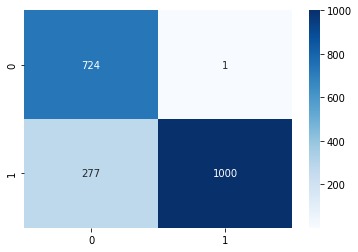

In [ ]:
# TRANSFER-LEARNING RESULTS ---------------------------

total_val_samples = validation_generator.n
print("El generador de validación tiene", total_val_samples, "imágenes")

steps = total_val_samples // batch_size

results = np.concatenate([(y, model_transfer.predict(x=x)) for x, y in valid_dataset], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

In [ ]:
#----------------------------------------------------ANA_PARAMETRICA----------------------------------------------------------------------------------

In [1]:
# Importar las librerías necesarias
import os
import zipfile
from google.colab import drive

# Montar Google Drive en Colab
drive.mount('/content/drive', force_remount=True)

# Función para extraer un archivo .zip y guardar su contenido en la carpeta /content/dataset/
def extraer_zip(ruta_zip, ruta_destino='/content/dataset/'):
  # Extraer el nombre del archivo .zip sin la extensión
  nombre_archivo = os.path.splitext(os.path.basename(ruta_zip))[0]
  # Combinar la ruta de destino con el nombre del archivo
  ruta_archivo = os.path.join(ruta_destino, nombre_archivo)
  # Extraer el contenido del archivo .zip en la ruta de destino
  with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
      zip_ref.extractall(ruta_archivo)
  # Retornar la ruta donde se extrajeron los datos
  return ruta_archivo

# Ejemplo de uso de la función
ruta_zip = '/content/drive/MyDrive/flowers.zip'
ruta_destino = '/content/dataset/'
ruta_datos = extraer_zip(ruta_zip, ruta_destino)



Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

In [14]:

# DATA SOURCE -----------------------------------------Primero va esto, para intentar saber el número de clases que se me han pasado

from PIL import Image

batch_size = 25

import os

def buscar_carpeta(ruta_base,name):
    for ruta_actual, carpetas, archivos in os.walk(ruta_base):
        if name in carpetas:
            # Si se encuentra la carpeta "name", se construye la ruta completa a la carpeta
            ruta = os.path.join(ruta_actual, name)
            return ruta
    # Si no se encuentra la carpeta "name", se devuelve None
    return None


train_data_dir = buscar_carpeta('/content/dataset/','train')
validation_data_dir = buscar_carpeta('/content/dataset/','val')
test_data_dir = buscar_carpeta('/content/dataset/','test')

#A partir de la ruta que se ha mandado, buscamos cuantas etiquetas hay en ella
num_classes = len(os.listdir(train_data_dir))

#Dependiendo del número de etiquetas, será un modelo binario o categórico.

if(num_classes == 2):
    mode = 'binary'
    function = tf.keras.losses.binary_crossentropy
else:
    mode = 'categorical'
    function = tf.keras.losses.categorical_crossentropy

#Generador de imagenes

def random_image():
  directory = test_data_dir

  # Obtener la lista de archivos en la carpeta
  files = os.listdir(directory)

  # Seleccionar un archivo aleatorio
  filename = random.choice(files)


  directory_img = os.path.join(directory, filename) # Ruta completa del directorio que contiene las imágenes

  # Obtener una lista de todas las imágenes en el directorio
  images = os.listdir(directory_img)

  # Seleccionar una imagen aleatoria del directorio
  random_image = random.choice(images)
  return os.path.join(directory_img, random_image)


test_datagen = ImageDataGenerator(
          rescale=1./255
)
validation_datagen = ImageDataGenerator(
          rescale=1./255
)

datagen = ImageDataGenerator(
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      rescale=1./255,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = datagen.flow_from_directory(
          train_data_dir,
          target_size=(250, 250),
          batch_size=batch_size,
          class_mode=mode)

validation_generator = validation_datagen.flow_from_directory(
          validation_data_dir,
          target_size=(250, 250),
          batch_size=batch_size,
          class_mode=mode,
          shuffle=False)

valid_dataset = keras.preprocessing.image_dataset_from_directory(
      directory= buscar_carpeta('/content/dataset/','val'),
      image_size=(250,250),
      batch_size=batch_size,
      label_mode=mode
)

test_dataset = keras.preprocessing.image_dataset_from_directory(
      directory= buscar_carpeta('/content/dataset/','test'),
      image_size=(250,250),
      batch_size=batch_size,
      label_mode=mode
)

  
print(mode)
print(str(function))
print("La IA ha encontrado " + str(num_classes) + " clases")

Found 4582 images belonging to 4 classes.
Found 1309 images belonging to 4 classes.
Found 1309 files belonging to 4 classes.
Found 657 files belonging to 4 classes.
categorical
<function categorical_crossentropy at 0x7f1a7b766ee0>
La IA ha encontrado 4 clases


In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.regularizers import l2

model_transfer = VGG16(weights='imagenet', include_top=True)
base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(250, 250, 3),
    include_top=False)

base_model.trainable = False

inputs = keras.Input(shape=(250, 250, 3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
#x = keras.layers.Dropout(0.5)(x) # Capa de Dropout



#x = keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)

x = keras.layers.Dense(256, activation='relu')(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x) #OJO CON ESTO, SI CAMBIAS LAS ETIQUETAS CAMBIA EL NUMERO DE OUTPUTS B

model_transfer = keras.Model(inputs, outputs)

58889256/58889256 [==============================] - 3s 0us/step


In [16]:
model_transfer.compile(loss=function,
                      optimizer=tf.keras.optimizers.Adam(1e-3),
                      metrics=['accuracy'])

epochs = 5

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

h = model_transfer.fit(
        train_generator,
        epochs=epochs, 
        validation_data=validation_generator,
        callbacks = [es]
)

Epoch 1/5
184/184 [==============================] - 117s 630ms/step - loss: 0.1519 - accuracy: 0.9561 - val_loss: 0.0749 - val_accuracy: 0.9794
Epoch 2/5
184/184 [==============================] - 114s 621ms/step - loss: 0.1027 - accuracy: 0.9697 - val_loss: 0.0909 - val_accuracy: 0.9717
Epoch 3/5
184/184 [==============================] - 125s 678ms/step - loss: 0.0925 - accuracy: 0.9697 - val_loss: 0.0617 - val_accuracy: 0.9748
Epoch 4/5
184/184 [==============================] - 114s 621ms/step - loss: 0.0709 - accuracy: 0.9747 - val_loss: 0.0487 - val_accuracy: 0.9855
Epoch 5/5
184/184 [==============================] - 116s 629ms/step - loss: 0.0597 - accuracy: 0.9810 - val_loss: 0.0529 - val_accuracy: 0.9771


El generador de validación tiene 1309 imágenes
1/1 [==============================] - 0s 26ms/step
              precision    recall  f1-score   support

           0     0.9498    1.0000    0.9743       284
           1     0.9973    0.8146    0.8967       453
           2     0.7752    0.9914    0.8701       233
           3     0.9591    0.9676    0.9633       339

    accuracy                         0.9259      1309
   macro avg     0.9203    0.9434    0.9261      1309
weighted avg     0.9376    0.9259    0.9260      1309



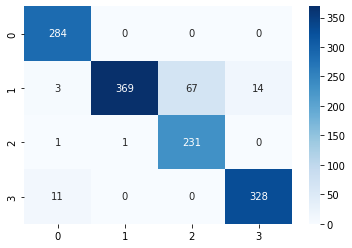

In [17]:
#Results.
# TRANSFER-LEARNING RESULTS ---------------------------

total_val_samples = validation_generator.n
print("El generador de validación tiene", total_val_samples, "imágenes")

steps = total_val_samples // batch_size

results = np.concatenate([(y, model_transfer.predict(x=x)) for x, y in valid_dataset], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))



1/1 [==============================] - 0s 38ms/step
              precision    recall  f1-score   support

           0     0.9267    1.0000    0.9619       139
           1     0.9892    0.8106    0.8910       227
           2     0.7517    0.9912    0.8550       113
           3     0.9709    0.9382    0.9543       178

    accuracy                         0.9163       657
   macro avg     0.9096    0.9350    0.9156       657
weighted avg     0.9302    0.9163    0.9170       657



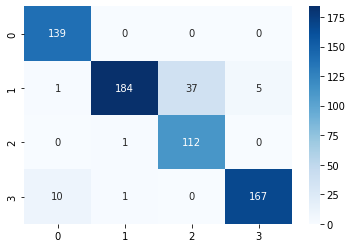

In [18]:
#Results.
# TRANSFER-LEARNING RESULTS ---------------------------
results = np.concatenate([(y, model_transfer.predict(x=x)) for x, y in test_dataset], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

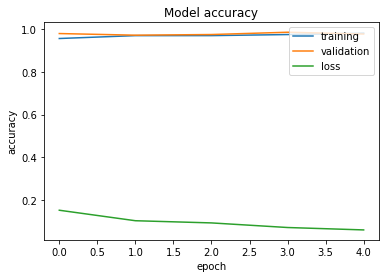

In [19]:
# EVALUATION ------------------------------------------

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

(500, 753, 3)


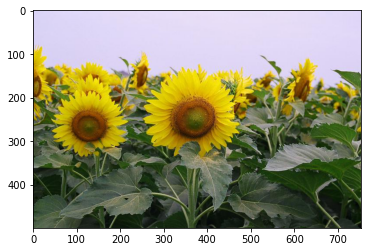

1/1 [==============================] - 0s 24ms/step
{'dandelion': 0, 'orchid': 1, 'rose': 2, 'sunflower': 3}
3
3

I see a picture of sunflower


In [32]:
#Prueba en caliente

import os
import random
from keras.preprocessing import image

def random_image():
  directory = test_data_dir

  # Obtener la lista de archivos en la carpeta
  files = os.listdir(directory)

  # Seleccionar un archivo aleatorio
  filename = random.choice(files)


  directory_img = os.path.join(directory, filename) # Ruta completa del directorio que contiene las imágenes

  # Obtener una lista de todas las imágenes en el directorio
  images = os.listdir(directory_img)

  # Seleccionar una imagen aleatoria del directorio
  random_image = random.choice(images)
  return os.path.join(directory_img, random_image)

picture = random_image();
pil_im = Image.open(picture, 'r')
print(np.asarray(pil_im).shape)
plt.imshow(np.asarray(pil_im))
plt.show()


img = keras.preprocessing.image.load_img(
    picture, target_size=(250,250)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model_transfer.predict(img_array)
predictions_transfer = model_transfer.predict(img_array)

print(train_generator.class_indices)
print(np.argmax(predictions[0]))
print(np.argmax(predictions_transfer[0]))
class_names = list(train_generator.class_indices.keys())
print()

if np.argmax(predictions_transfer[0]) < len(class_names):
    print("I see a picture of " + class_names[np.argmax(predictions_transfer[0])])
else:
    print("Unknown class")




(500, 568, 3)


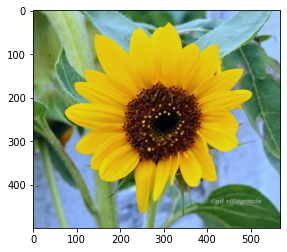

1/1 [==============================] - 0s 27ms/step
{'dandelion': 0, 'orchid': 1, 'rose': 2, 'sunflower': 3}
3
3

I see a picture of sunflower


In [43]:
model_transfer.save('Ana_Flowers.h5')
Ana_flowers = keras.models.load_model('Ana_Flowers.h5')
#Prueba en caliente

import os
import random
from keras.preprocessing import image

def random_image():
  directory = test_data_dir

  # Obtener la lista de archivos en la carpeta
  files = os.listdir(directory)

  # Seleccionar un archivo aleatorio
  filename = random.choice(files)


  directory_img = os.path.join(directory, filename) # Ruta completa del directorio que contiene las imágenes

  # Obtener una lista de todas las imágenes en el directorio
  images = os.listdir(directory_img)

  # Seleccionar una imagen aleatoria del directorio
  random_image = random.choice(images)
  return os.path.join(directory_img, random_image)

picture = random_image();
pil_im = Image.open(picture, 'r')
print(np.asarray(pil_im).shape)
plt.imshow(np.asarray(pil_im))
plt.show()


img = keras.preprocessing.image.load_img(
    picture, target_size=(250,250)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = Ana_flowers.predict(img_array)
predictions_transfer = Ana_flowers.predict(img_array)

print(train_generator.class_indices)
print(np.argmax(predictions[0]))
print(np.argmax(predictions_transfer[0]))
class_names = list(train_generator.class_indices.keys())
print()

if np.argmax(predictions_transfer[0]) < len(class_names):
    print("I see a picture of " + class_names[np.argmax(predictions_transfer[0])])
else:
    print("Unknown class")


